<a href="https://colab.research.google.com/github/Ujjwalb2/investx/blob/main/invest_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import ta
#from datetime import datetime

In [117]:
df = pd.read_csv('/content/df_data (2).csv')
print(df.head())
df=df.head(750)

         Date        Open        High         Low       Close   Adj Close  \
0  2020-02-11  441.359985  442.529999  437.470001  439.850006  400.351318   
1  2020-02-12  439.010010  439.690002  434.600006  436.600006  397.393127   
2  2020-02-13  435.799988  439.290009  434.299988  434.700012  395.663757   
3  2020-02-14  434.980011  438.470001  434.309998  437.850006  398.530884   
4  2020-02-18  437.000000  438.950012  434.010010  435.549988  396.437378   

    Volume  Alligator Jaw  Alligator Teeth  Alligator Lips        RSI  \
0   744600     434.422309       434.462501      438.588006  69.120006   
1  1419200     434.737694       435.522503      438.870007  63.142026   
2   800200     434.916156       436.877506      438.016009  59.881434   
3   948600     434.968463       437.761257      437.752008  63.268036   
4   776100     435.100001       437.806255      436.910004  59.329833   

         ADX  Fibonacci_0  Fibonacci_0.236  Fibonacci_0.382  Fibonacci_0.618  \
0  63.928889   439

In [118]:
#df['Alligator Jaw'] = ta.trend.sma_indicator(df['Close'], window=13)
#df['Alligator Teeth'] = ta.trend.sma_indicator(df['Close'], window=8)
#df['Alligator Lips'] = ta.trend.sma_indicator(df['Close'], window=5)


In [119]:
#df['RSI'] = ta.momentum.rsi(df['Close'], window=14)

In [120]:
#df['ADX'] = ta.trend.adx(df['High'], df['Low'], df['Close'], window=14)

In [121]:
#df['Fibonacci_0'] = df['Close']
#df['Fibonacci_0.236'] = df['Close'] + (df['High'] - df['Low']) * 0.236
#df['Fibonacci_0.382'] = df['Close'] + (df['High'] - df['Low']) * 0.382
#df['Fibonacci_0.618'] = df['Close'] + (df['High'] - df['Low']) * 0.618

In [122]:
#df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3
#df['VWAP'] = (df['TP'] * df['Volume']).cumsum() / df['Volume'].cumsum()


In [123]:
#df.to_excel('/content/df_data.xlsx', index=False)

In [124]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Alligator Jaw,Alligator Teeth,Alligator Lips,RSI,ADX,Fibonacci_0,Fibonacci_0.236,Fibonacci_0.382,Fibonacci_0.618,TP,VWAP
0,2020-02-11,441.359985,442.529999,437.470001,439.850006,400.351318,744600,434.422309,434.462501,438.588006,69.120006,63.928889,439.850006,441.044166,441.782925,442.977085,439.950002,423.700907
1,2020-02-12,439.010010,439.690002,434.600006,436.600006,397.393127,1419200,434.737694,435.522503,438.870007,63.142026,62.499103,436.600006,437.801245,438.544384,439.745624,436.963338,424.201298
2,2020-02-13,435.799988,439.290009,434.299988,434.700012,395.663757,800200,434.916156,436.877506,438.016009,59.881434,61.079877,434.700012,435.877657,436.606200,437.783845,436.096670,424.449084
3,2020-02-14,434.980011,438.470001,434.309998,437.850006,398.530884,948600,434.968463,437.761257,437.752008,63.268036,59.762025,437.850006,438.831767,439.439127,440.420888,436.876668,424.748570
4,2020-02-18,437.000000,438.950012,434.010010,435.549988,396.437378,776100,435.100001,437.806255,436.910004,59.329833,58.604936,435.549988,436.715828,437.437069,438.602909,436.170003,424.969403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,2022-12-15,481.000000,485.100006,475.119995,478.790009,472.608063,1067300,484.966158,483.085003,482.820001,50.379275,18.475247,478.790009,481.145292,482.602373,484.957656,479.670003,386.385606
719,2022-12-16,475.630005,482.609985,473.670013,481.790009,475.569305,2590600,484.788466,482.808754,482.462006,52.675160,17.839244,481.790009,483.899842,485.205078,487.314912,479.356669,386.594589
720,2022-12-19,481.779999,487.980011,479.929993,481.790009,475.569305,929700,484.526928,482.882504,481.556006,52.675160,16.794209,481.790009,483.689813,484.865116,486.764920,483.233338,386.672484
721,2022-12-20,482.880005,491.450012,481.820007,486.149994,479.873016,1014300,484.716158,482.978752,482.742005,56.098863,16.342842,486.149994,488.422675,489.828656,492.101337,486.473338,386.760171


In [125]:
df = pd.read_csv('/content/df_data (2).csv')
print(df.head())
df=df.head(500) #total data = 699

         Date        Open        High         Low       Close   Adj Close  \
0  2020-02-11  441.359985  442.529999  437.470001  439.850006  400.351318   
1  2020-02-12  439.010010  439.690002  434.600006  436.600006  397.393127   
2  2020-02-13  435.799988  439.290009  434.299988  434.700012  395.663757   
3  2020-02-14  434.980011  438.470001  434.309998  437.850006  398.530884   
4  2020-02-18  437.000000  438.950012  434.010010  435.549988  396.437378   

    Volume  Alligator Jaw  Alligator Teeth  Alligator Lips        RSI  \
0   744600     434.422309       434.462501      438.588006  69.120006   
1  1419200     434.737694       435.522503      438.870007  63.142026   
2   800200     434.916156       436.877506      438.016009  59.881434   
3   948600     434.968463       437.761257      437.752008  63.268036   
4   776100     435.100001       437.806255      436.910004  59.329833   

         ADX  Fibonacci_0  Fibonacci_0.236  Fibonacci_0.382  Fibonacci_0.618  \
0  63.928889   439

In [126]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Alligator Jaw,Alligator Teeth,Alligator Lips,RSI,ADX,Fibonacci_0,Fibonacci_0.236,Fibonacci_0.382,Fibonacci_0.618,TP,VWAP
0,2020-02-11,441.359985,442.529999,437.470001,439.850006,400.351318,744600,434.422309,434.462501,438.588006,69.120006,63.928889,439.850006,441.044166,441.782925,442.977085,439.950002,423.700907
1,2020-02-12,439.010010,439.690002,434.600006,436.600006,397.393127,1419200,434.737694,435.522503,438.870007,63.142026,62.499103,436.600006,437.801245,438.544384,439.745624,436.963338,424.201298
2,2020-02-13,435.799988,439.290009,434.299988,434.700012,395.663757,800200,434.916156,436.877506,438.016009,59.881434,61.079877,434.700012,435.877657,436.606200,437.783845,436.096670,424.449084
3,2020-02-14,434.980011,438.470001,434.309998,437.850006,398.530884,948600,434.968463,437.761257,437.752008,63.268036,59.762025,437.850006,438.831767,439.439127,440.420888,436.876668,424.748570
4,2020-02-18,437.000000,438.950012,434.010010,435.549988,396.437378,776100,435.100001,437.806255,436.910004,59.329833,58.604936,435.549988,436.715828,437.437069,438.602909,436.170003,424.969403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2022-01-27,389.390015,395.600006,384.739990,389.079987,374.229553,2566200,374.423845,380.127499,382.403998,74.632731,34.791334,389.079987,391.642951,393.228513,395.791477,389.806661,364.875349
496,2022-01-28,389.100006,393.329987,384.779999,393.149994,378.144196,2145100,376.723844,382.203747,386.793994,76.697711,36.027624,393.149994,395.167791,396.416089,398.433887,390.419993,364.944407
497,2022-01-31,390.500000,390.989990,384.679993,389.130005,374.277679,2363400,378.646151,383.678749,389.953998,70.585840,37.151013,389.130005,390.619164,391.540424,393.029583,388.266663,365.013667
498,2022-02-01,390.220001,390.510010,386.209991,387.010010,372.238556,1951100,380.623845,385.163750,389.921997,67.529647,38.194160,387.010010,388.024814,388.652617,389.667422,387.910004,365.069663


In [127]:
#df.to_excel('/content/df_data.xlsx', index=False)

In [128]:
cols = list(df)[1:18]
print(cols)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Alligator Jaw', 'Alligator Teeth', 'Alligator Lips', 'RSI', 'ADX', 'Fibonacci_0', 'Fibonacci_0.236', 'Fibonacci_0.382', 'Fibonacci_0.618', 'TP', 'VWAP']


In [129]:
df_for_train = df[cols].astype(float)
df_for_training = df_for_train[:]

In [130]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [131]:
trainX = []
trainY = []

In [132]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14 # Number of past days we want to use to predict the future.

In [133]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 16])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (486, 14, 17).
trainY shape == (486, 1).


In [134]:
df_for_training_scaled

array([[ 3.24016765,  3.19912084,  3.20595114, ...,  3.18559601,
         3.22871209,  4.64570161],
       [ 3.13804822,  3.07275571,  3.08232809, ...,  3.04191512,
         3.09693778,  4.69167022],
       [ 2.99855499,  3.05495809,  3.06940502, ...,  2.95468831,
         3.05869959,  4.71443319],
       ...,
       [ 1.03001966,  0.90585784,  0.93205799, ...,  0.96477367,
         0.94839654, -0.74562863],
       [ 1.01785215,  0.88450122,  0.99796159, ...,  0.81528145,
         0.93266042, -0.74048451],
       [ 0.83924919,  0.78839225,  0.94627324, ...,  0.80357394,
         0.88809833, -0.73641894]])

In [135]:
trainY

array([[ 3.87389935e+00],
       [ 3.81446609e+00],
       [ 3.73778841e+00],
       [ 3.62925995e+00],
       [ 3.39787345e+00],
       [ 3.23895521e+00],
       [ 3.11223513e+00],
       [ 2.70318817e+00],
       [ 2.33538762e+00],
       [ 2.06227330e+00],
       [ 1.81408452e+00],
       [ 1.55260021e+00],
       [ 1.35178329e+00],
       [ 1.08647082e+00],
       [ 7.62124297e-01],
       [ 4.98219123e-01],
       [ 3.29887070e-01],
       [ 2.49571929e-01],
       [ 1.70860612e-01],
       [ 1.33492903e-01],
       [ 7.40111578e-02],
       [ 7.65692064e-03],
       [-3.04627709e-02],
       [-6.42490218e-02],
       [-7.53191587e-02],
       [-8.86326042e-02],
       [-9.70441822e-02],
       [-9.91494538e-02],
       [-1.01068955e-01],
       [-9.13198250e-02],
       [-9.07129434e-02],
       [-8.52060593e-02],
       [-5.62057875e-02],
       [-3.98855397e-02],
       [-3.13401871e-02],
       [-2.57830250e-02],
       [-2.09057133e-02],
       [-1.64345755e-02],
       [-9.6

In [136]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) 
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 64)            20992     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 33,441
Trainable params: 33,441
Non-trainable params: 0
_________________________________________________________________


In [137]:
history = model.fit(trainX, trainY, epochs=5, batch_size=3, validation_split=0.1, verbose=1)

Epoch 1/5
146/146 [==============================] - 6s 17ms/step - loss: 2.4218 - val_loss: 0.0982
Epoch 2/5
146/146 [==============================] - 2s 14ms/step - loss: 0.0732 - val_loss: 0.0230
Epoch 3/5
146/146 [==============================] - 2s 14ms/step - loss: 0.0710 - val_loss: 0.0726
Epoch 4/5
146/146 [==============================] - 2s 14ms/step - loss: 0.0433 - val_loss: 0.0201
Epoch 5/5
146/146 [==============================] - 3s 20ms/step - loss: 0.0414 - val_loss: 0.0940


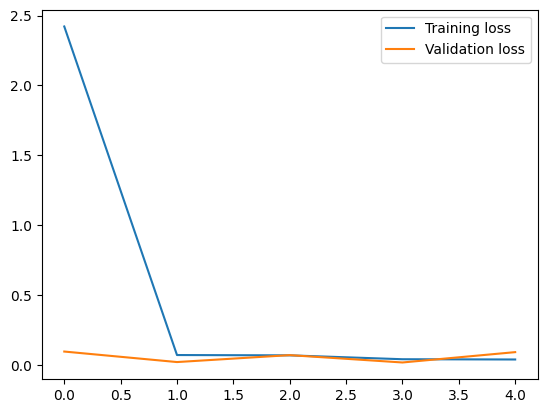

In [138]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [139]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [140]:

df2= df.head(699)
train_dates = pd.to_datetime(df2['Date'])
print(train_dates.tail(15)) 

485   2022-01-12
486   2022-01-13
487   2022-01-14
488   2022-01-18
489   2022-01-19
490   2022-01-20
491   2022-01-21
492   2022-01-24
493   2022-01-25
494   2022-01-26
495   2022-01-27
496   2022-01-28
497   2022-01-31
498   2022-02-01
499   2022-02-02
Name: Date, dtype: datetime64[ns]


In [141]:
n_past = 1
n_days_for_prediction=285 #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='d').tolist()
print(predict_period_dates)

[Timestamp('2022-02-02 00:00:00', freq='D'), Timestamp('2022-02-03 00:00:00', freq='D'), Timestamp('2022-02-04 00:00:00', freq='D'), Timestamp('2022-02-05 00:00:00', freq='D'), Timestamp('2022-02-06 00:00:00', freq='D'), Timestamp('2022-02-07 00:00:00', freq='D'), Timestamp('2022-02-08 00:00:00', freq='D'), Timestamp('2022-02-09 00:00:00', freq='D'), Timestamp('2022-02-10 00:00:00', freq='D'), Timestamp('2022-02-11 00:00:00', freq='D'), Timestamp('2022-02-12 00:00:00', freq='D'), Timestamp('2022-02-13 00:00:00', freq='D'), Timestamp('2022-02-14 00:00:00', freq='D'), Timestamp('2022-02-15 00:00:00', freq='D'), Timestamp('2022-02-16 00:00:00', freq='D'), Timestamp('2022-02-17 00:00:00', freq='D'), Timestamp('2022-02-18 00:00:00', freq='D'), Timestamp('2022-02-19 00:00:00', freq='D'), Timestamp('2022-02-20 00:00:00', freq='D'), Timestamp('2022-02-21 00:00:00', freq='D'), Timestamp('2022-02-22 00:00:00', freq='D'), Timestamp('2022-02-23 00:00:00', freq='D'), Timestamp('2022-02-24 00:00:00'

In [142]:
prediction = model.predict(trainX[-n_days_for_prediction:])

9/9 [==============================] - 1s 8ms/step


In [154]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,4]

In [155]:
df_forecast

,Date,price
0,2022-02-02,370.536407
1,2022-02-03,370.451233
2,2022-02-04,370.226257
3,2022-02-05,370.538483
4,2022-02-06,370.427399
...,...,...
280,2022-11-09,355.168304
281,2022-11-10,355.284424
282,2022-11-11,355.171539
283,2022-11-12,355.118469


In [156]:
y_pred_future

array([346.5865 , 346.51105, 346.31183, 346.58835, 346.48996, 346.23166,
       345.8403 , 345.27914, 344.8275 , 344.5198 , 344.2128 , 344.0141 ,
       343.787  , 343.55087, 343.4033 , 343.31735, 343.36563, 343.42807,
       343.4279 , 343.20596, 342.9268 , 342.64655, 342.3427 , 342.0432 ,
       341.7527 , 341.47696, 341.31702, 341.1927 , 341.02335, 340.76163,
       340.53577, 340.2017 , 339.95706, 339.72656, 339.4857 , 339.16187,
       338.87003, 338.62634, 338.40115, 338.18628, 337.99826, 337.95572,
       337.859  , 337.7343 , 337.6344 , 337.57306, 337.4819 , 337.3528 ,
       337.25995, 337.14386, 337.0274 , 336.9756 , 336.96576, 336.8963 ,
       336.78006, 336.65704, 336.52753, 336.40683, 336.27914, 336.15433,
       336.0506 , 335.93393, 335.742  , 335.50134, 335.42395, 335.2989 ,
       335.3817 , 335.3039 , 335.15234, 334.9782 , 334.86465, 334.79715,
       334.7268 , 334.64273, 334.51877, 334.29166, 333.99838, 333.8157 ,
       333.94254, 333.67963, 333.34174, 332.98685, 

In [157]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [158]:
original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original


<ipython-input-158-4a6fe6619364>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


,Date,Close
0,2020-02-11,439.850006
1,2020-02-12,436.600006
2,2020-02-13,434.700012
3,2020-02-14,437.850006
4,2020-02-18,435.549988
...,...,...
495,2022-01-27,389.079987
496,2022-01-28,393.149994
497,2022-01-31,389.130005
498,2022-02-01,387.010010


In [159]:
df_forecast

,Date,price
0,2022-02-02,346.586487
1,2022-02-03,346.511047
2,2022-02-04,346.311829
3,2022-02-05,346.588348
4,2022-02-06,346.489960
...,...,...
280,2022-11-09,332.976379
281,2022-11-10,333.079224
282,2022-11-11,332.979248
283,2022-11-12,332.932220


<Axes: xlabel='Date'>

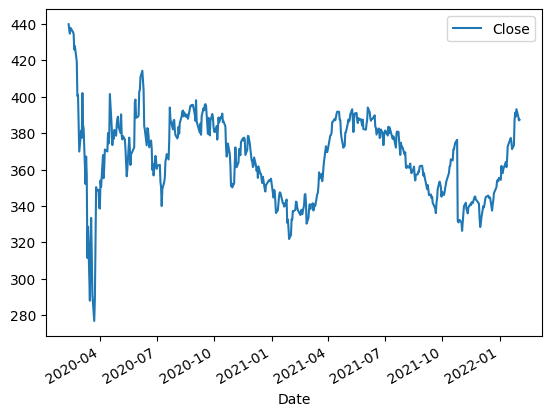

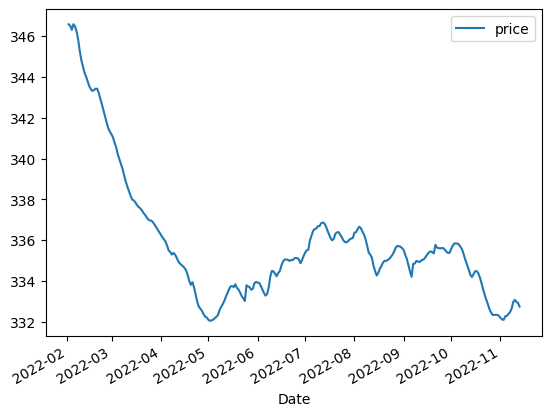

In [160]:
original.plot(x='Date',y='Close')
original= pd.concat([original,df_forecast],axis=0)
original.plot(x='Date',y='price')
#f_forecast.plot(x='Date',y='price')


In [161]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [162]:
def RMS(actual,predicted):
    rms = math.sqrt((((actual-predicted)/actual)**2).mean())
    return rms

In [163]:

error = (RMS(original['Close'],df_forecast['price']))*100


In [164]:
error


10.52372931937191

In [165]:
Efficiency = 100 - error
print("Efficiency = ",Efficiency,"%")

Efficiency =  89.47627068062809 %
